<a href="https://colab.research.google.com/github/thor4/neuralnets/blob/master/projects/1-CNN/step6-generate_figure-cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize results

## 1: Load confidence & accuracy results
Run the cell to download a zip file from OSF then extract 30 excel spreadsheets containing results for each of the 9 confidence accuracy pairs into the current directory.

In [1]:
# @title Download results

import requests, os
from zipfile import ZipFile

print("Start downloading and unzipping confidence & accuracy results for 30 models...")
name = 'cifar10_gabors-models-results'
fname = f"{name}.zip"
url = f"https://osf.io/a5jxg/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall() #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")

Start downloading and unzipping confidence & accuracy results for 30 models...
Download completed.


These were the average confidence and accuracy results of the 30 iterations of the CIFAR10 model fine-tuned on Gabors.

Load necessary libraries.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from scipy.stats import sem
import matplotlib.pyplot as plt
import matplotlib

In [3]:
model0 = pd.read_excel('cifar10_gabors-model_0-results.xlsx', index_col=None)

In [4]:
model0

,Tilt,Contrast,Accuracy,Confidence
0,1.0833,0.30,0.53900,0.419014
1,NaN,0.45,0.58450,0.455601
2,NaN,1.00,0.80025,0.845920
3,2.3958,0.30,0.59850,0.433360
4,NaN,0.45,0.68400,0.502371
5,NaN,1.00,0.96600,1.472474
6,4.0000,0.30,0.64975,0.454129
7,NaN,0.45,0.76550,0.567528
8,NaN,1.00,0.99600,2.427286


In [17]:
tilts = [1.0833, 1.0833, 1.0833, 2.3958, 2.3958, 2.3958, 4, 4, 4]
model0['Tilt']=tilts
model0

,Tilt,Contrast,Accuracy,Confidence
0,1.0833,0.30,0.53900,0.419014
1,1.0833,0.45,0.58450,0.455601
2,1.0833,1.00,0.80025,0.845920
3,2.3958,0.30,0.59850,0.433360
4,2.3958,0.45,0.68400,0.502371
5,2.3958,1.00,0.96600,1.472474
6,4.0000,0.30,0.64975,0.454129
7,4.0000,0.45,0.76550,0.567528
8,4.0000,1.00,0.99600,2.427286


In [6]:
model0.groupby(['Contrast']).mean()['Accuracy'] #avg acc across tilts


Contrast
0.30    0.59575
0.45    0.67800
1.00    0.92075
Name: Accuracy, dtype: float64

In [7]:
model0.groupby(['Tilt']).mean()['Accuracy'] #avg acc across contrasts

Tilt
1.0833    0.64125
2.3958    0.74950
4.0000    0.80375
Name: Accuracy, dtype: float64

In [8]:
t = model0.groupby(['Contrast']).mean()['Confidence'] #avg conf across tilts
t

Contrast
0.30    0.435501
0.45    0.508500
1.00    1.581893
Name: Confidence, dtype: float64

In [9]:
t[1]-t[0.3] #high contrast - low contrast

1.146392271862055

In [10]:
model0.groupby(['Tilt']).mean()['Confidence'] #avg conf across contrasts

Tilt
1.0833    0.573512
2.3958    0.802735
4.0000    1.149648
Name: Confidence, dtype: float64

Let's stack results from all 30 models into the `df_cifar10` dataframe. Additionally, we will make a new dataframe for figure 1d calculating the difference in accuracy across tilts between contrasts 3 and 1, difference in accuracy across contrasts between tilts 3 and 1, difference in confidence across tilts between contrasts 3 and 1, and difference in confidence across contrasts between tilts 3 and 1.

In [21]:
num_iter = 30
tilts = [1.0833, 1.0833, 1.0833, 2.3958, 2.3958, 2.3958, 4, 4, 4]
df_cifar10 = pd.DataFrame(columns=['Tilt','Contrast','Accuracy','Confidence']) #init dataframe
df_fig1d = pd.DataFrame(columns=['Acc diff x tilts','Acc diff x contrasts',
                                 'Conf diff x tilts','Conf diff x contrasts']) #init df
for iteration in range(num_iter):
  model_results_excel = "cifar10_gabors-model_{}-results.xlsx".format(iteration)
  model = pd.read_excel(model_results_excel, index_col=None)
  model['Tilt']=tilts #ensure no NaNs in tilt column
  df_cifar10 = pd.concat([df_cifar10, model], axis=0, ignore_index=True) #append acc & conf to dataframe
  avg_acc_x_tilts = model.groupby(['Contrast']).mean()['Accuracy'] #avg acc across tilts
  avg_acc_x_contrasts = model.groupby(['Tilt']).mean()['Accuracy'] #avg acc across contrasts
  avg_conf_x_tilts = model.groupby(['Contrast']).mean()['Confidence'] #avg conf across tilts
  avg_conf_x_contrasts = model.groupby(['Tilt']).mean()['Confidence'] #avg conf across contrasts
  acc_diff_tilts = avg_acc_x_tilts[1] - avg_acc_x_tilts[0.3] #high contrast - lowest contrast
  acc_diff_con = avg_acc_x_contrasts[tilts[8]] - avg_acc_x_contrasts[tilts[0]] #high tilt - lowest tilt
  conf_diff_tilts = avg_conf_x_tilts[1] - avg_conf_x_tilts[0.3]
  conf_diff_con = avg_conf_x_contrasts[tilts[8]] - avg_conf_x_contrasts[tilts[0]]
  df_fig1d = pd.concat([df_fig1d, pd.DataFrame({'Acc diff x tilts':[acc_diff_tilts],
                                                'Acc diff x contrasts':[acc_diff_con],
                                                'Conf diff x tilts':[conf_diff_tilts],
                                                'Conf diff x contrasts':[conf_diff_con]})], 
                       axis=0, ignore_index=True) #append to dataframe

In [22]:
df_cifar10

,Tilt,Contrast,Accuracy,Confidence
0,1.0833,0.30,0.53900,0.419014
1,1.0833,0.45,0.58450,0.455601
2,1.0833,1.00,0.80025,0.845920
3,2.3958,0.30,0.59850,0.433360
4,2.3958,0.45,0.68400,0.502371
...,...,...,...,...
265,2.3958,0.45,0.72050,0.454596
266,2.3958,1.00,0.89450,0.943432
267,4.0000,0.30,0.66950,0.452529
268,4.0000,0.45,0.82350,0.538215


We are left with 270 rows (30 models * 9). Each model's results will be treated as a subject.

In [23]:
df_fig1d

,Acc diff x tilts,Acc diff x contrasts,Conf diff x tilts,Conf diff x contrasts
0,0.325000,0.162500,1.146392,0.576136
1,0.335250,0.158750,1.279899,0.660930
2,0.322417,0.176583,1.591408,0.837764
3,0.316667,0.163583,0.396323,0.313296
4,0.285917,0.200833,0.770368,0.405464
5,0.310833,0.178083,1.267269,0.633716
6,0.352167,0.147583,1.395636,0.732812
7,0.331000,0.172083,0.529216,0.419759
8,0.276083,0.157417,0.237918,0.167877
9,0.248667,0.216000,0.497754,0.198912


## 2: Prepare remaining variables for figure
Next we need to calculate the remaining variables necessary to generate the figure.

In [24]:
grouped = df_cifar10.groupby(['Tilt','Contrast'])
sem_conf = grouped['Confidence'].agg(sem)
sem_acc = grouped['Accuracy'].agg(sem)

In [25]:
sem_conf

Tilt    Contrast
1.0833  0.30        0.016819
        0.45        0.017023
        1.00        0.032011
2.3958  0.30        0.017717
        0.45        0.019887
        1.00        0.066512
4.0000  0.30        0.019030
        0.45        0.025540
        1.00        0.108934
Name: Confidence, dtype: float64

## 3: Plot the figure
Setup all the plotting helper functions.

In [31]:
def show_sem(axs, err_b): #get sem for fig 1a-c plots
  y_measurement = []
  for idx,p in enumerate(axs.patches):    
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    axs.errorbar(_x, _y, yerr=err_b.iloc[idx], color="k")
    y_measurement.append(_y)
  return y_measurement
def draw_fig1a(df, sem_acc, ax1):
  fig1a = sns.barplot(data=df, x="Tilt", y="Accuracy", 
                hue="Contrast", palette="pastel", ci=None, ax=ax1)
  ax1.set_ylim(0.5,1)
  ax1.set_xlabel('Magnitude of tilt')
  mean_acc = show_sem(ax1, sem_acc)
  return mean_acc
def draw_fig1b(df, sem_conf, ax2):
  fig1b = sns.barplot(data=df, x="Tilt", y="Confidence", 
                hue="Contrast", palette="pastel", ci=None, ax=ax2)
  ax2.set_ylim(0.25,2.15)
  ax2.set_xlabel('Magnitude of tilt')
  mean_conf = show_sem(ax2, sem_conf)
  return mean_conf
def draw_fig1c(ax1, ax2, mean_acc, mean_conf):
  fig1c_x = [mean_acc[6], mean_acc[4], mean_acc[2]]
  fig1c_y = [mean_conf[6], mean_conf[4], mean_conf[2]]
  colors_1c = [plt.cm.Set3(0), plt.cm.Set3(3), plt.cm.Set3(4)]
  for idx, color in enumerate(['Contrast 1 Tilt 1.0833', 'Contrast 0.45 Tilt 2.3958', 
                             'Contrast 0.3 Tilt 4']):
    ax3.scatter(fig1c_x[idx], fig1c_y[idx], color=colors_1c[idx], label=color,
               marker='d', linewidths=5)
  ax3.legend()
  ax3.errorbar(fig1c_x, fig1c_y, xerr=np.array(sem_acc.iloc[[6, 4, 2]]), 
             yerr=np.array(sem_conf.iloc[[6, 4, 2]]), color="k", 
             linestyle='None', elinewidth=0.5)
  #ax3.set_ylim(2,2.8), ax3.set_xlim(0.58,0.72)
  ax3.set_xlabel('Accuracy'), ax3.set_ylabel('Confidence') 
def draw_fig1d(df_fig1d, ax4):
  ax4.set_xlabel(r'$\Delta$Accuracy & $\Delta$Confidence')
  ax4.set_ylabel('Accuracy') 
  tilt_acc_diff = df_fig1d['Acc diff x contrasts'].mean()
  tilt_acc_diff_sem = df_fig1d['Acc diff x contrasts'].sem()
  cont_acc_diff = df_fig1d['Acc diff x tilts'].mean()
  cont_acc_diff_sem = df_fig1d['Acc diff x tilts'].sem()
  left = [tilt_acc_diff,cont_acc_diff]
  left_sem = pd.DataFrame([tilt_acc_diff_sem,cont_acc_diff_sem])
  colors_1d = [plt.cm.Set3(5), plt.cm.Set3(2)]
  tilt_conf_diff = df_fig1d['Conf diff x contrasts'].mean()
  tilt_conf_diff_sem = df_fig1d['Conf diff x contrasts'].sem()
  cont_conf_diff = df_fig1d['Conf diff x tilts'].mean()
  cont_conf_diff_sem = df_fig1d['Conf diff x tilts'].sem()
  right_sem = pd.DataFrame([tilt_conf_diff_sem,cont_conf_diff_sem])
  for idx, label in enumerate(['Tilt', 'Contrast']):
    ax4.bar(idx, left[idx], width=-0.8, align='edge', color=colors_1d[idx], 
            label=label) 
  show_sem(ax4, left_sem)
  #ax4.set_xticklabels([r'$\Delta$Accuracy',])
  ax4.set_xticklabels([]), ax4.tick_params(axis='x', bottom=False)
  ax4.set_frame_on(False), ax4.legend(loc=9) 
  # Adding Twin Axes
  ax5 = ax4.twinx()
  ax5.set_ylabel('Confidence') 
  ax5.bar([3,4], [tilt_conf_diff,cont_conf_diff], width=0.8, align='edge',
          color=[plt.cm.Set3(5), plt.cm.Set3(2)], label='Contrast') 
  show_sem(ax5, right_sem)
  ax5.set_frame_on(False), ax5.set_xticklabels([])

Draw the figure for behavioral results.

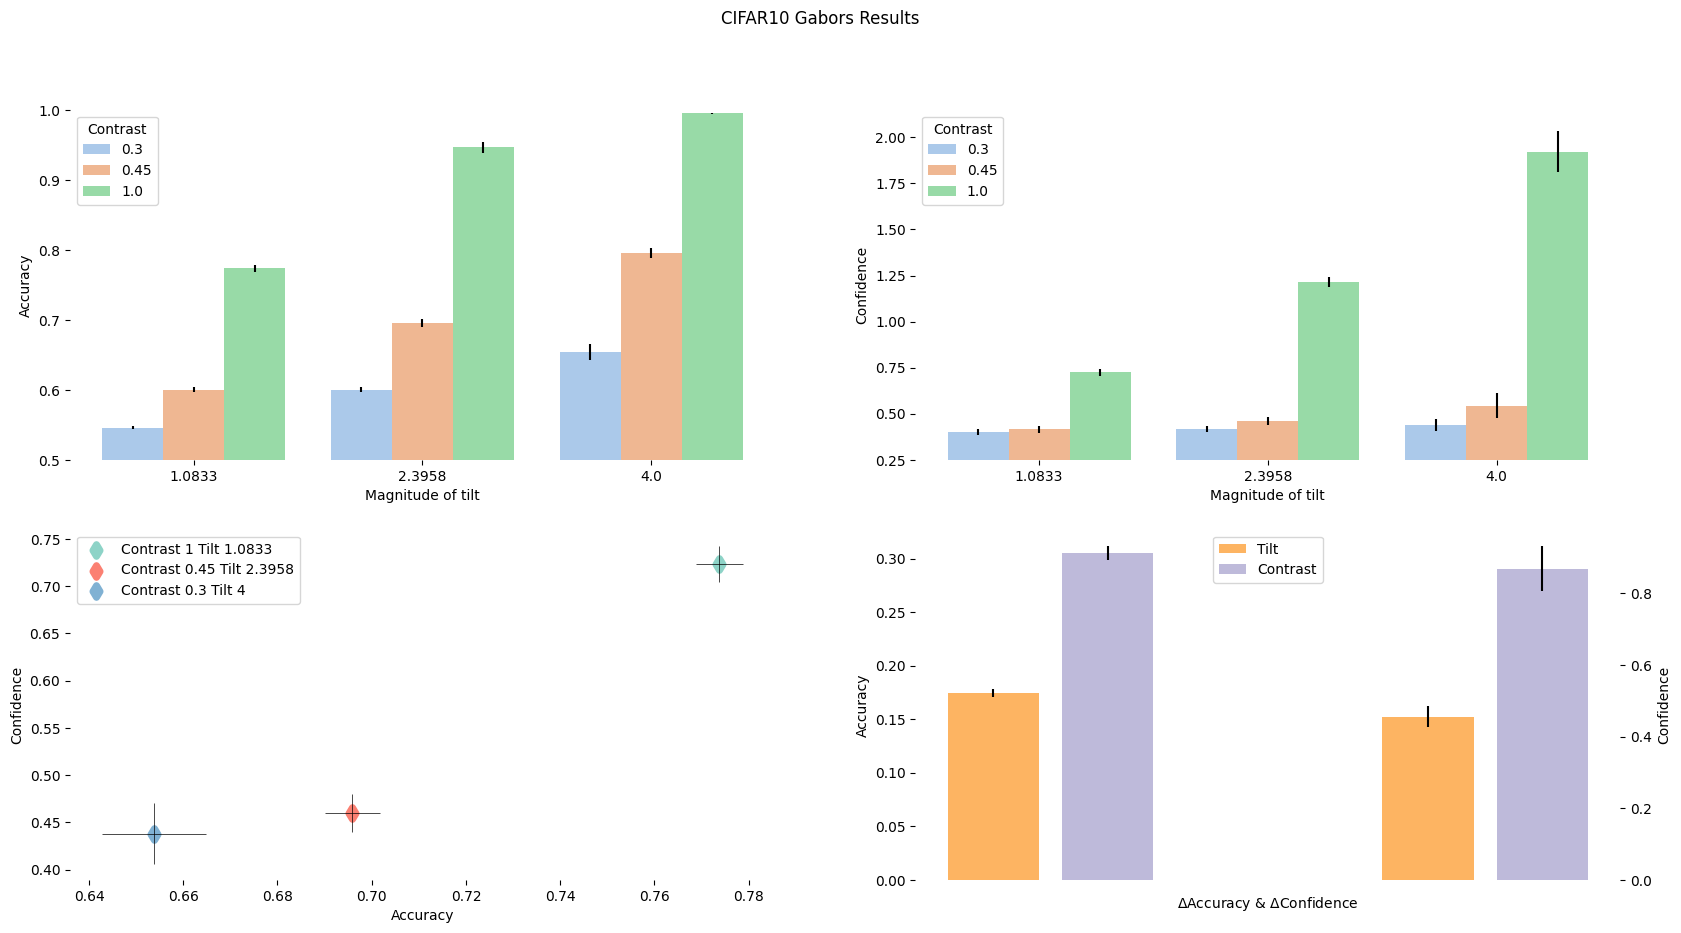

In [32]:
#sns.set_theme(style="whitegrid")
matplotlib.rc_file_defaults() #reset defaults
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10)) #set up canvas
sns.despine(fig, left=True, bottom=True)
mean_acc = draw_fig1a(df_cifar10, sem_acc, ax1)
mean_conf = draw_fig1b(df_cifar10, sem_conf, ax2)
draw_fig1c(ax1, ax2, mean_acc, mean_conf)
draw_fig1d(df_fig1d, ax4)
fig.suptitle('CIFAR10 Gabors Results')
#plt.tight_layout()
plt.savefig('fig1-cifar10.png', transparent=True, dpi=300)